#### Problem : #### 
You have been engaged as a data science consultant by a coal terminal.They would like you to investigate on their heavy machine - RL1 

you have been supplied one month worth of data for all of their machine. The data set showws what percentahe of capacity for each machine was idle(unused ) in any given hour. You are required to deliver an R list with the 

following compontenats :

character  : Machine name\
vector  : (min,mean,max) utilization for more then month (excluading unknown hours)\
Logical : Has utilization ever fallen below 90%? TRUE/FALSE\
vector : All hours where utilization is unknown (N/A's)\
dataframe : For this machine \
plot : For all machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data  = pd.read_csv("P3-Machine-Utilization.csv")
data.head(10)

Timestamp Machine  Percent Idle
0  01/09/2016 00:00     RL1           NaN
1  01/09/2016 01:00     RL1           NaN
2  01/09/2016 02:00     RL1           NaN
3  01/09/2016 03:00     RL1           NaN
4  01/09/2016 04:00     RL1           NaN
5  01/09/2016 05:00     RL1           NaN
6  01/09/2016 06:00     RL1           NaN
7  01/09/2016 07:00     RL1       0.01994
8  01/09/2016 08:00     RL1       0.01997
9  01/09/2016 09:00     RL1       0.02119

In [2]:
data.shape

(3600, 3)

In [3]:
data.isna().sum()

Timestamp         0
Machine           0
Percent Idle    361
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     3600 non-null   object 
 1   Machine       3600 non-null   object 
 2   Percent Idle  3239 non-null   float64
dtypes: float64(1), object(2)
memory usage: 84.5+ KB


In [5]:
data['Percent Idle'].describe()

count    3239.000000
mean        0.043131
std         0.023398
min         0.000000
25%         0.026196
50%         0.041045
75%         0.057558
max         0.150774
Name: Percent Idle, dtype: float64

In [6]:
data['Utilization'] = 1 - data['Percent Idle']
data

Timestamp Machine  Percent Idle  Utilization
0     01/09/2016 00:00     RL1           NaN          NaN
1     01/09/2016 01:00     RL1           NaN          NaN
2     01/09/2016 02:00     RL1           NaN          NaN
3     01/09/2016 03:00     RL1           NaN          NaN
4     01/09/2016 04:00     RL1           NaN          NaN
...                ...     ...           ...          ...
3595  30/09/2016 19:00     SR6      0.046051     0.953949
3596  30/09/2016 20:00     SR6      0.044275     0.955725
3597  30/09/2016 21:00     SR6      0.041413     0.958587
3598  30/09/2016 22:00     SR6      0.067500     0.932500
3599  30/09/2016 23:00     SR6      0.053551     0.946449

[3600 rows x 4 columns]

##### Python Programmimg What is List?

In [7]:
RL1 = data[data['Machine']=='RL1']
RL1.describe()

Percent Idle  Utilization
count    713.000000   713.000000
mean       0.048302     0.951698
std        0.024302     0.024302
min        0.005000     0.849226
25%        0.032083     0.940327
50%        0.046131     0.953869
75%        0.059673     0.967917
max        0.150774     0.995000

In [8]:
RL1['Machine']

0      RL1
1      RL1
2      RL1
3      RL1
4      RL1
      ... 
715    RL1
716    RL1
717    RL1
718    RL1
719    RL1
Name: Machine, Length: 720, dtype: object

In [9]:
data_RL1 = RL1['Utilization']
data_stats_RL1= [data_RL1.min(skipna=True),data_RL1.max(skipna=True),data_RL1.mean(skipna=True)]
data_stats_RL1

[0.84922619, 0.995, 0.9516975973450211]

In [10]:
data_under_90 = len(np.where(RL1['Utilization']<0.90)) > 0
data_under_90

True

In [11]:
list_rl1 = list["RL1",data_stats_RL1,data_under_90]
list_rl1

list['RL1', [0.84922619, 0.995, 0.9516975973450211], True]

##### Naming Components of a list 

In [12]:
# Another way to create the dictionary directly
list_rl1 = {
    "Machine": "RL1",
    "Stats": data_stats_RL1 ,
    "LowThreshold": data_under_90
}

print(list_rl1)


{'Machine': 'RL1', 'Stats': [0.84922619, 0.995, 0.9516975973450211], 'LowThreshold': True}


##### Extracting Compontents of a list

In [13]:
print(list_rl1['Machine'])

RL1


In [14]:
print(list_rl1['Stats'][1])

0.995


In [15]:
print(list_rl1['LowThreshold'])
type(list_rl1['Stats'])

True


list

##### Adding and deleting components 

In [16]:
list_rl1

{'Machine': 'RL1',
 'Stats': [0.84922619, 0.995, 0.9516975973450211],
 'LowThreshold': True}

In [17]:
list_rl1[4] = "Information"
list_rl1

{'Machine': 'RL1',
 'Stats': [0.84922619, 0.995, 0.9516975973450211],
 'LowThreshold': True,
 4: 'Information'}

In [18]:
RL1

Timestamp Machine  Percent Idle  Utilization
0    01/09/2016 00:00     RL1           NaN          NaN
1    01/09/2016 01:00     RL1           NaN          NaN
2    01/09/2016 02:00     RL1           NaN          NaN
3    01/09/2016 03:00     RL1           NaN          NaN
4    01/09/2016 04:00     RL1           NaN          NaN
..                ...     ...           ...          ...
715  30/09/2016 19:00     RL1      0.037500     0.962500
716  30/09/2016 20:00     RL1      0.035446     0.964554
717  30/09/2016 21:00     RL1      0.020060     0.979940
718  30/09/2016 22:00     RL1      0.020060     0.979940
719  30/09/2016 23:00     RL1      0.012143     0.987857

[720 rows x 4 columns]

In [19]:
list_rl1["Unknownhours"] =RL1.loc[RL1["Utilization"].isna(),"Timestamp"].to_list()
list_rl1

{'Machine': 'RL1',
 'Stats': [0.84922619, 0.995, 0.9516975973450211],
 'LowThreshold': True,
 4: 'Information',
 'Unknownhours': ['01/09/2016 00:00',
  '01/09/2016 01:00',
  '01/09/2016 02:00',
  '01/09/2016 03:00',
  '01/09/2016 04:00',
  '01/09/2016 05:00',
  '01/09/2016 06:00']}

In [20]:
list_rl1["Unknownhours"]

['01/09/2016 00:00',
 '01/09/2016 01:00',
 '01/09/2016 02:00',
 '01/09/2016 03:00',
 '01/09/2016 04:00',
 '01/09/2016 05:00',
 '01/09/2016 06:00']

##### Remove a components from list : use the NULL

In [21]:
list_rl1.pop(4,None) 

'Information'

In [22]:
list_rl1

{'Machine': 'RL1',
 'Stats': [0.84922619, 0.995, 0.9516975973450211],
 'LowThreshold': True,
 'Unknownhours': ['01/09/2016 00:00',
  '01/09/2016 01:00',
  '01/09/2016 02:00',
  '01/09/2016 03:00',
  '01/09/2016 04:00',
  '01/09/2016 05:00',
  '01/09/2016 06:00']}

In [24]:
# add another components for dataframe

list_rl1["data"] = RL1
list_rl1 

{'Machine': 'RL1',
 'Stats': [0.84922619, 0.995, 0.9516975973450211],
 'LowThreshold': True,
 'Unknownhours': ['01/09/2016 00:00',
  '01/09/2016 01:00',
  '01/09/2016 02:00',
  '01/09/2016 03:00',
  '01/09/2016 04:00',
  '01/09/2016 05:00',
  '01/09/2016 06:00'],
 'data':             Timestamp Machine  Percent Idle  Utilization
 0    01/09/2016 00:00     RL1           NaN          NaN
 1    01/09/2016 01:00     RL1           NaN          NaN
 2    01/09/2016 02:00     RL1           NaN          NaN
 3    01/09/2016 03:00     RL1           NaN          NaN
 4    01/09/2016 04:00     RL1           NaN          NaN
 ..                ...     ...           ...          ...
 715  30/09/2016 19:00     RL1      0.037500     0.962500
 716  30/09/2016 20:00     RL1      0.035446     0.964554
 717  30/09/2016 21:00     RL1      0.020060     0.979940
 718  30/09/2016 22:00     RL1      0.020060     0.979940
 719  30/09/2016 23:00     RL1      0.012143     0.987857
 
 [720 rows x 4 columns]}

##### Subsetting a list

In [36]:
list_rl1["Unknownhours"][0]

'01/09/2016 00:00'

In [44]:
# sublist_rl1 = list_rl1[["Machine"]["Stats"]]
# sublist_rl1

In [45]:
pip install plotnine

  Using cached plotnine-0.12.4-py3-none-any.whl.metadata (8.9 kB)
  Using cached mizani-0.9.3-py3-none-any.whl.metadata (4.6 kB)
Using cached plotnine-0.12.4-py3-none-any.whl (1.3 MB)
Using cached mizani-0.9.3-py3-none-any.whl (73 kB)
Note: you may need to restart the kernel to use updated packages.


#### Visulizing data

In [52]:
from plotnine import *
from plotnine.data import mtcars

In [72]:
data

Timestamp Machine  Percent Idle  Utilization
0     01/09/2016 00:00     RL1           NaN          NaN
1     01/09/2016 01:00     RL1           NaN          NaN
2     01/09/2016 02:00     RL1           NaN          NaN
3     01/09/2016 03:00     RL1           NaN          NaN
4     01/09/2016 04:00     RL1           NaN          NaN
...                ...     ...           ...          ...
3595  30/09/2016 19:00     SR6      0.046051     0.953949
3596  30/09/2016 20:00     SR6      0.044275     0.955725
3597  30/09/2016 21:00     SR6      0.041413     0.958587
3598  30/09/2016 22:00     SR6      0.067500     0.932500
3599  30/09/2016 23:00     SR6      0.053551     0.946449

[3600 rows x 4 columns]

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 361 rows containing missing values.


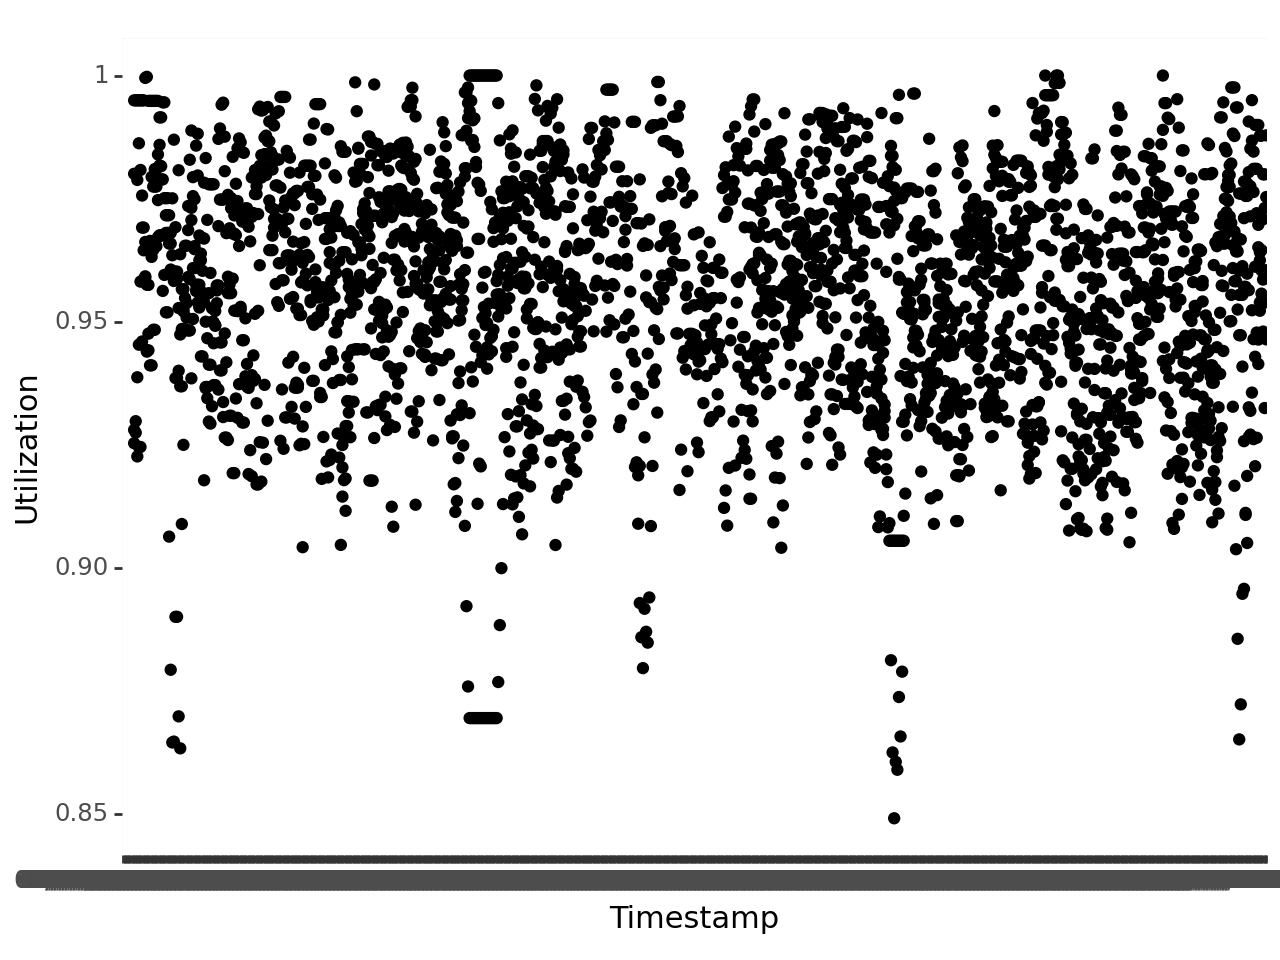

<Figure Size: (640 x 480)>

In [74]:
(ggplot(data, aes("Timestamp" , "Utilization")) + geom_point())

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 361 rows containing missing values.


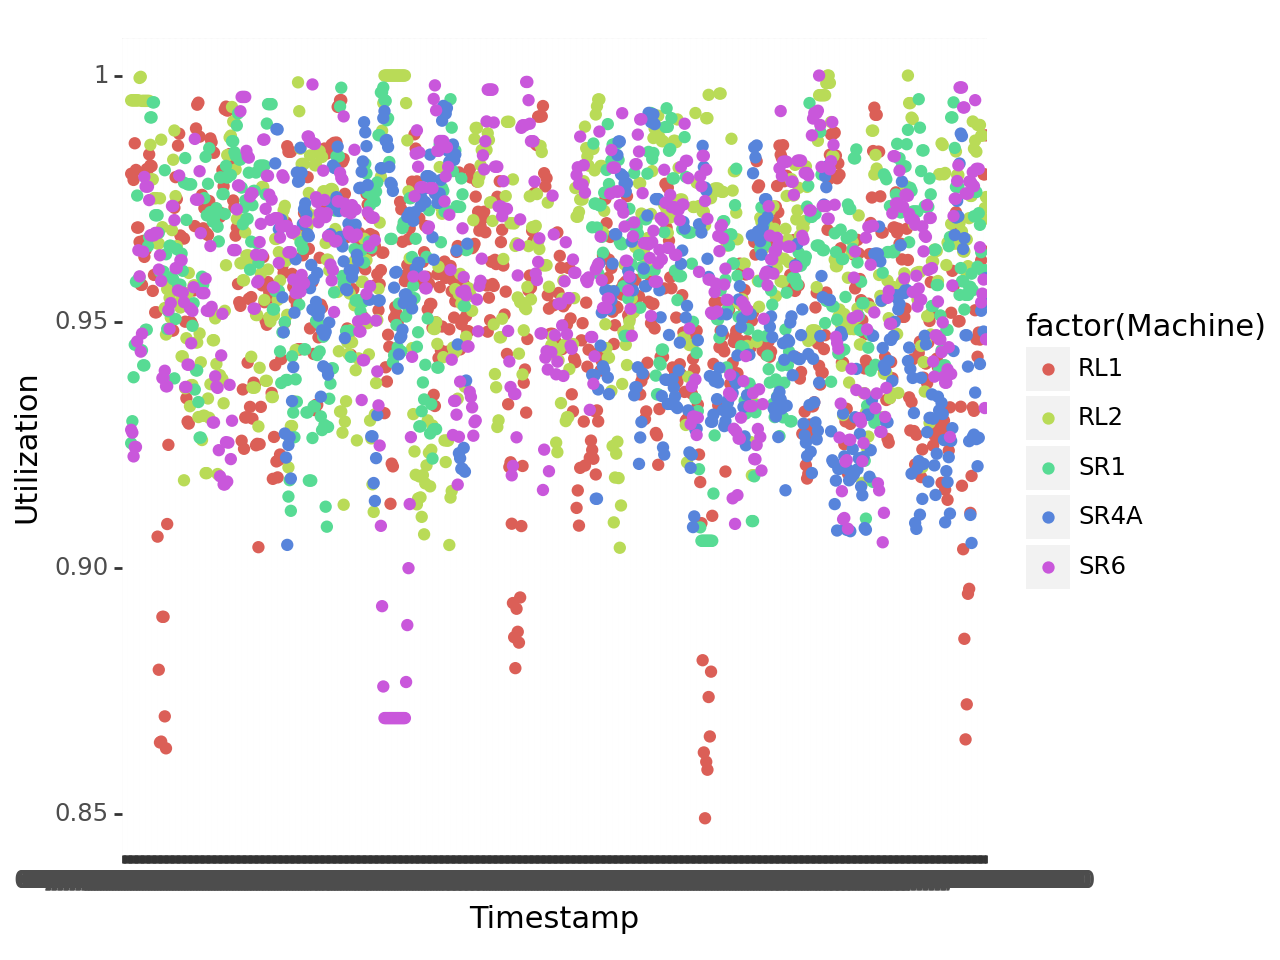

<Figure Size: (640 x 480)>

In [75]:
(ggplot(data, aes("Timestamp" , "Utilization",color  = "factor(Machine)")) + geom_point())

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\stats\stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\stats\stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\stats\stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\stats\stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough po

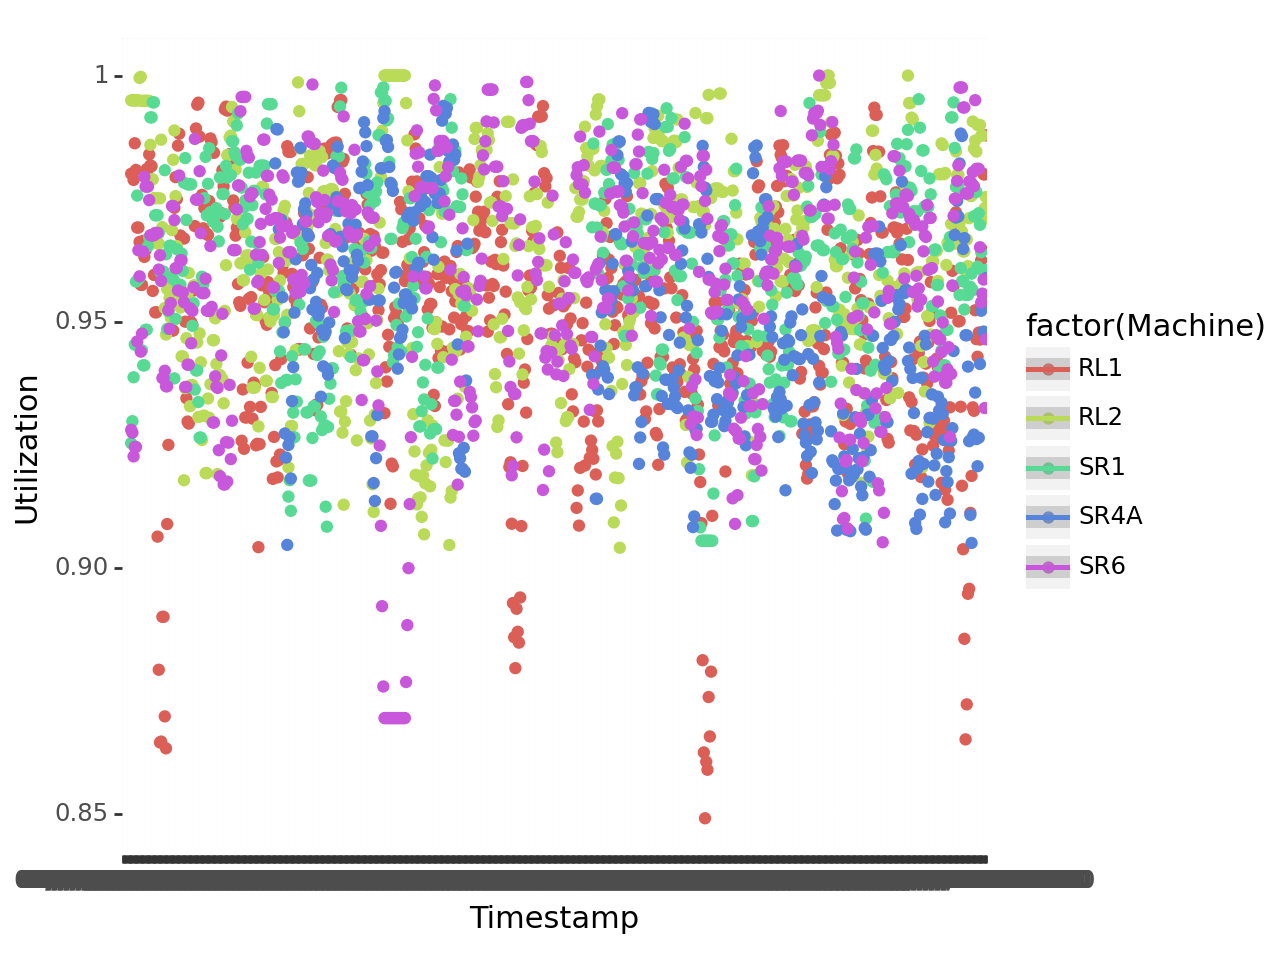

<Figure Size: (640 x 480)>

In [81]:
(ggplot(data, aes("Timestamp" , "Utilization",color  = "factor(Machine)")) + geom_point() + stat_smooth(method = "lm"))

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 361 rows containing missing values.


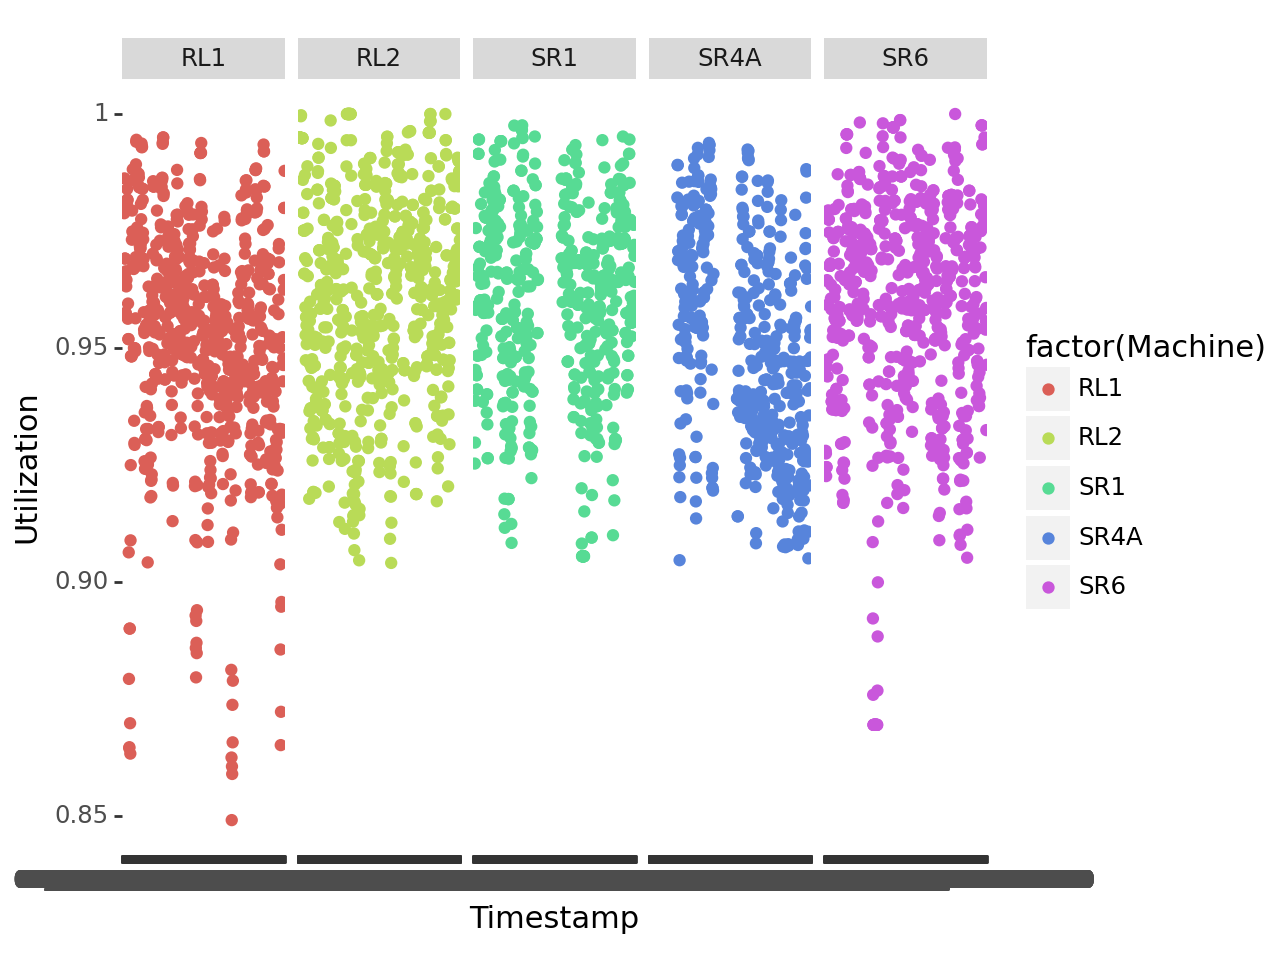

<Figure Size: (640 x 480)>

In [79]:
(ggplot(data, aes("Timestamp" , "Utilization",color  = "factor(Machine)")) + geom_point() + facet_grid("~Machine"))

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 361 rows containing missing values.


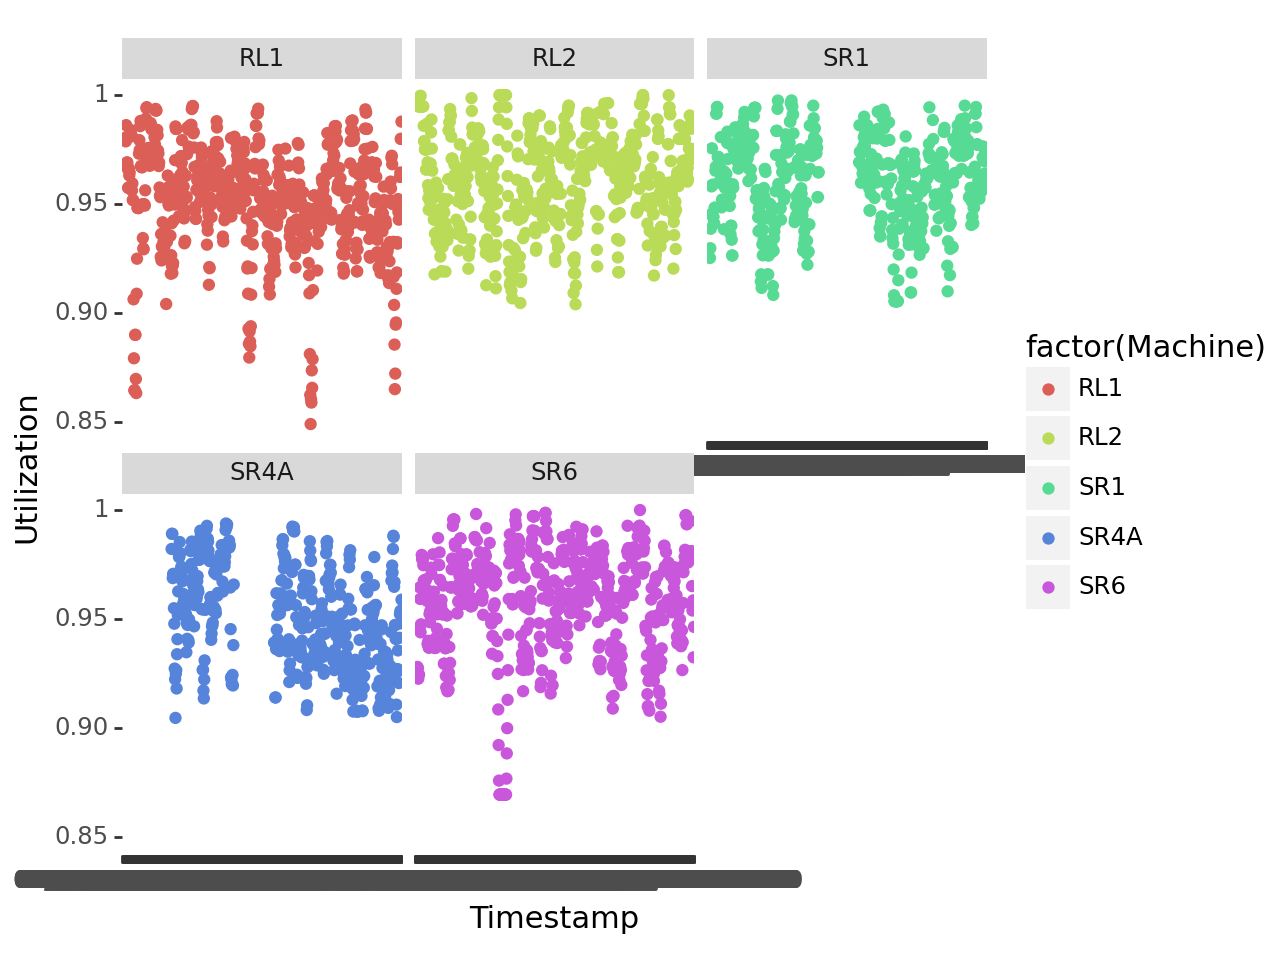

<Figure Size: (640 x 480)>

In [80]:
(ggplot(data, aes("Timestamp" , "Utilization",color  = "factor(Machine)")) + geom_point() + facet_wrap("~Machine"))

In [101]:
myplot = (ggplot(data, aes("Timestamp" , "Utilization",color  = "factor(Machine)")) + geom_point() + facet_wrap("~Machine") + theme_xkcd())

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 361 rows containing missing values.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' 

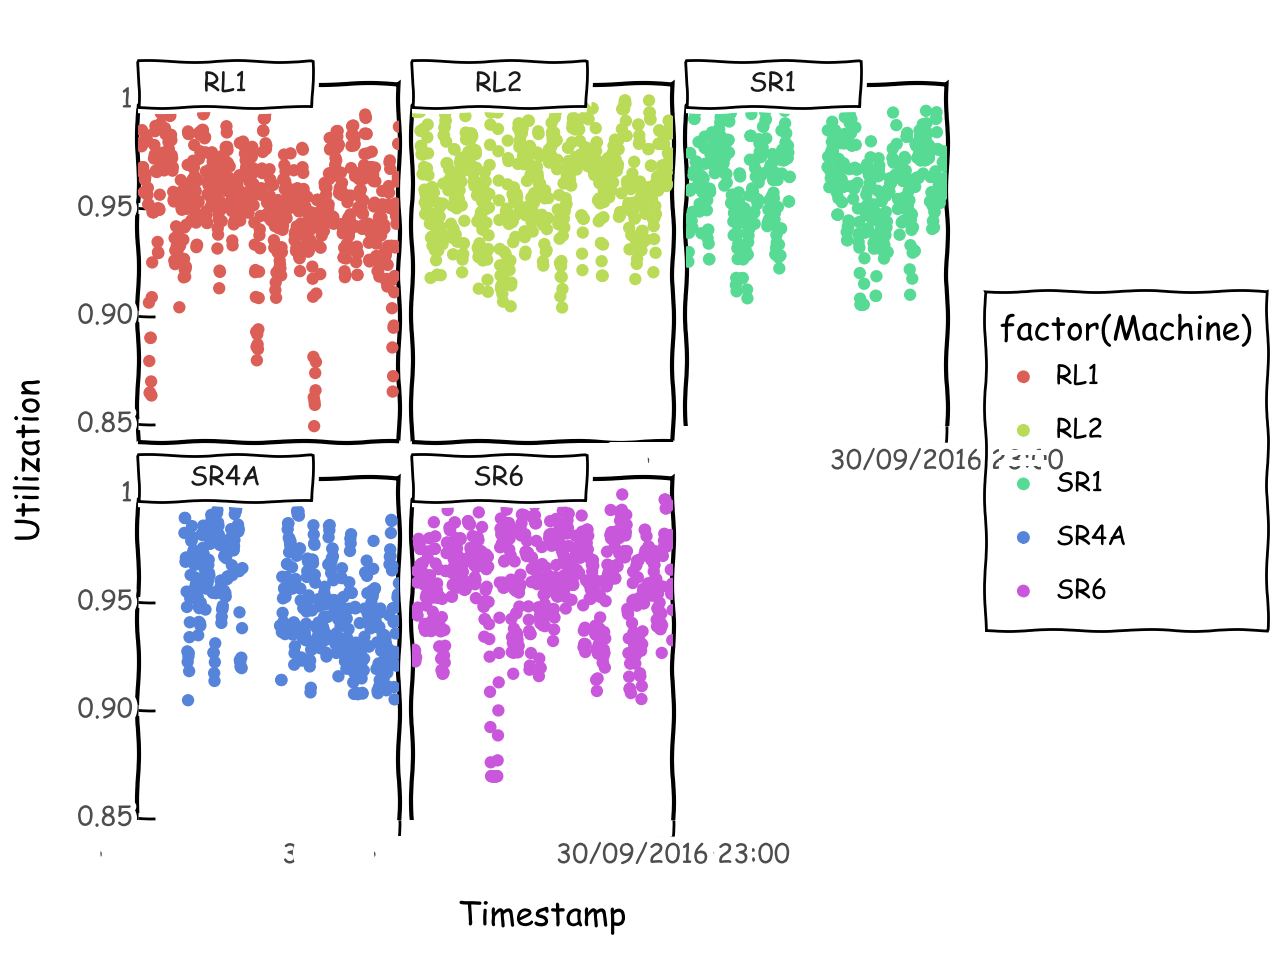

<Figure Size: (640 x 480)>

In [102]:
myplot

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 361 rows containing missing values.


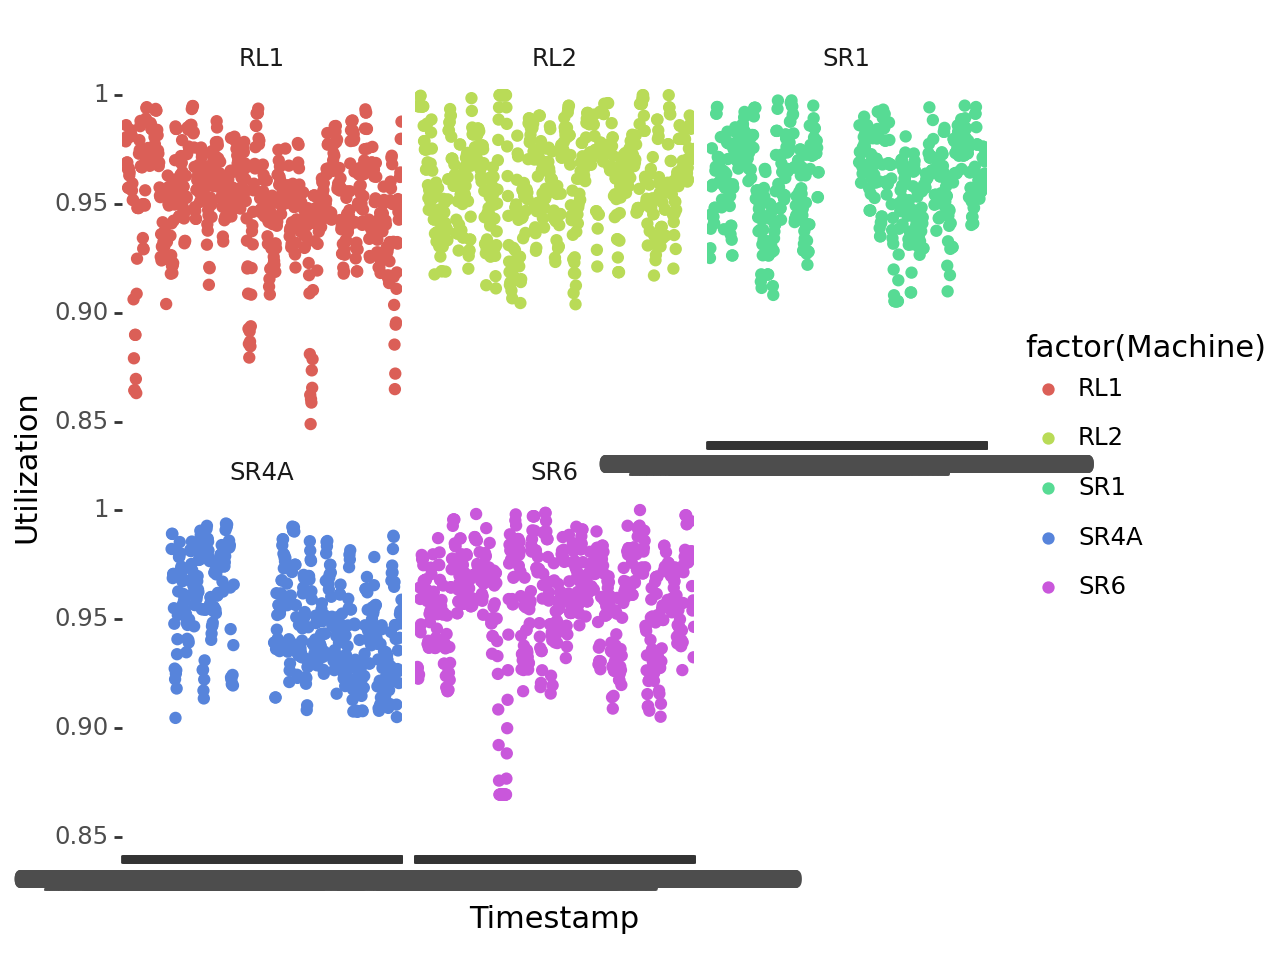

<Figure Size: (640 x 480)>

In [83]:
(ggplot(data, aes("Timestamp" , "Utilization",color  = "factor(Machine)")) + geom_point() + facet_wrap("~Machine") + theme_tufte())

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 7 rows containing missing values.
c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\geoms\geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\geoms\geom_path.py:98: PlotnineWarning: geom_path: Removed 7 rows containing missing values.
c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\geoms\geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


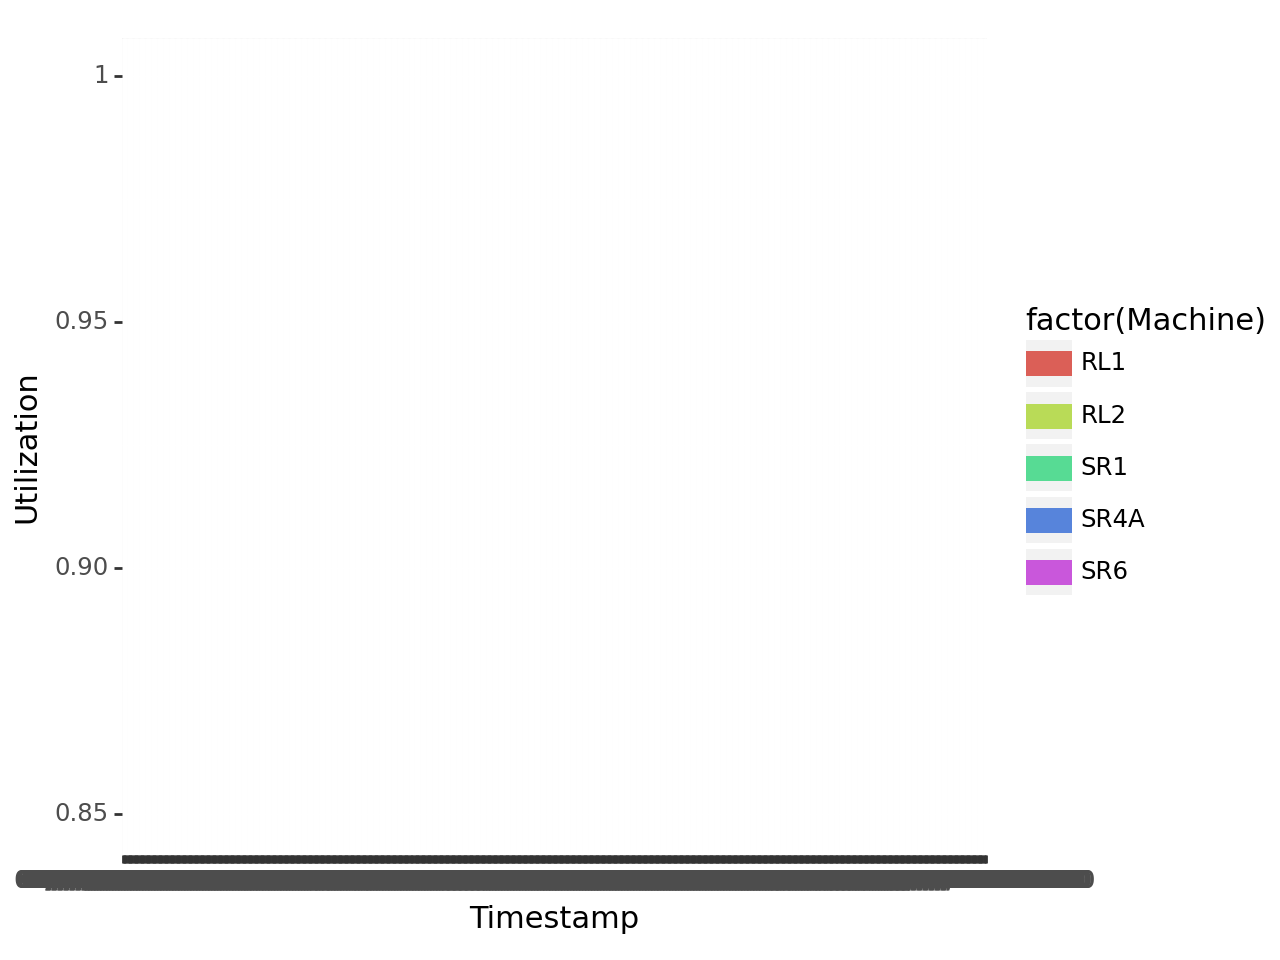

<Figure Size: (640 x 480)>

In [98]:
(ggplot(data, aes("Timestamp" , "Utilization",color  = "factor(Machine)")) +  geom_line(size=5) + geom_path(size=1))

In [96]:
# myplot = ggplot(data = data) + geom_line(aes(x="Timestamp", y="Utilization",
#                             colour="Machine"),
#                         size=0.75) + facet_grid("~Machine") + geom_hline(yintercept = 0.90,              #horizontal line at threshold
#                 colour="Gray", size=1.2,
#                 linetype=3)

In [99]:
# myplot

In [103]:
list_rl1["plot"] = myplot

c:\Users\visha\anaconda3\New_folder\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 361 rows containing missing values.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' 

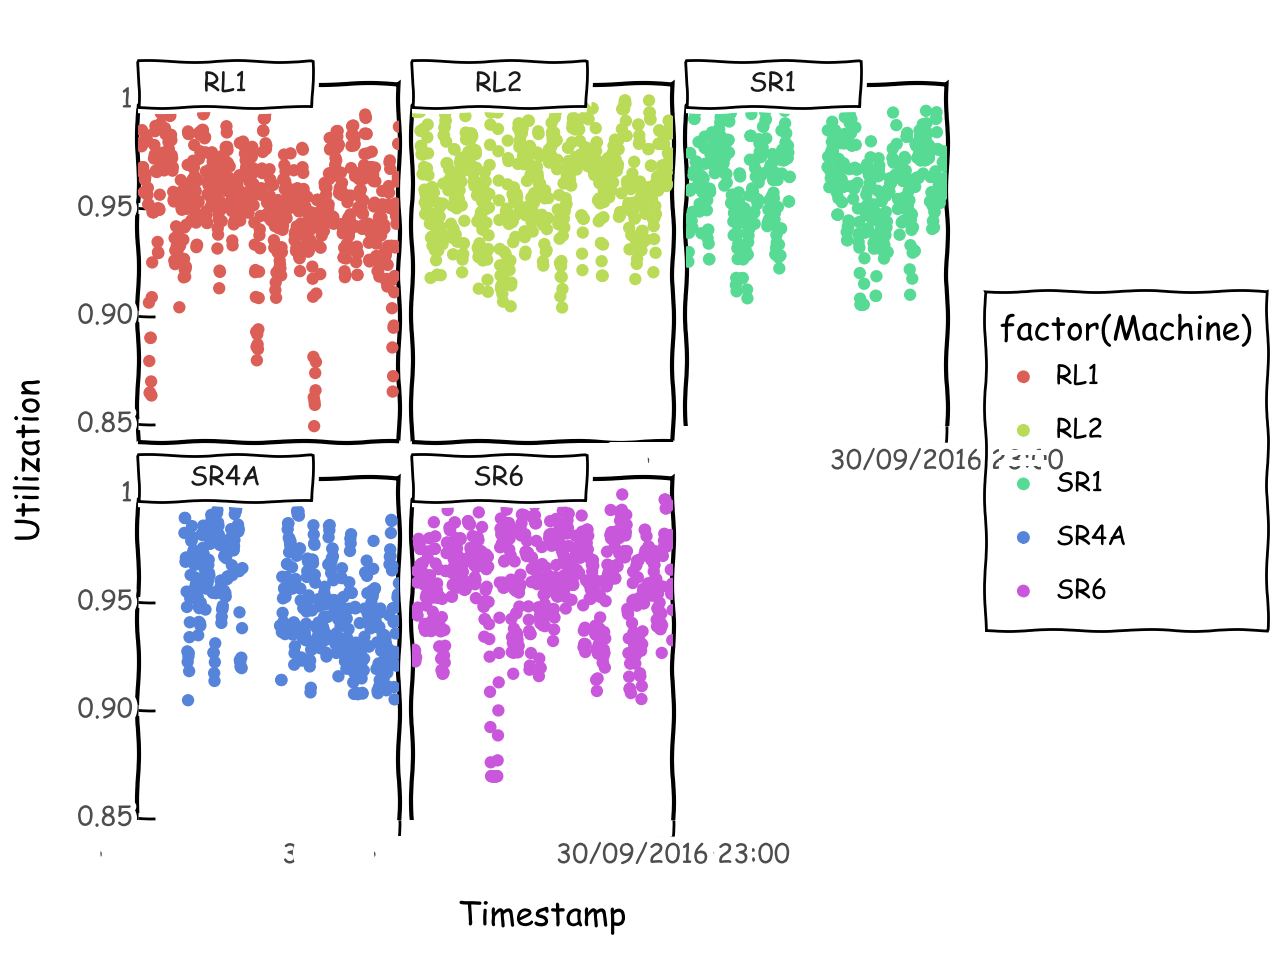

{'Machine': 'RL1',
 'Stats': [0.84922619, 0.995, 0.9516975973450211],
 'LowThreshold': True,
 'Unknownhours': ['01/09/2016 00:00',
  '01/09/2016 01:00',
  '01/09/2016 02:00',
  '01/09/2016 03:00',
  '01/09/2016 04:00',
  '01/09/2016 05:00',
  '01/09/2016 06:00'],
 'data':             Timestamp Machine  Percent Idle  Utilization
 0    01/09/2016 00:00     RL1           NaN          NaN
 1    01/09/2016 01:00     RL1           NaN          NaN
 2    01/09/2016 02:00     RL1           NaN          NaN
 3    01/09/2016 03:00     RL1           NaN          NaN
 4    01/09/2016 04:00     RL1           NaN          NaN
 ..                ...     ...           ...          ...
 715  30/09/2016 19:00     RL1      0.037500     0.962500
 716  30/09/2016 20:00     RL1      0.035446     0.964554
 717  30/09/2016 21:00     RL1      0.020060     0.979940
 718  30/09/2016 22:00     RL1      0.020060     0.979940
 719  30/09/2016 23:00     RL1      0.012143     0.987857
 
 [720 rows x 4 columns],
 'plo

In [104]:
list_rl1